In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
import os
import numpy as np

from matplotlib.lines import Line2D

from matplotlib.colors import ListedColormap
colors = ["#005845", "#84C497", "#F28E77", "#64C1CB", "#F3A44C"]
syke5 = ListedColormap(colors)

models = ['yolov8n', 'yolov8s', 'yolov8m', 'yolov8l', 'yolov8x']
model_path = Path('../runs')

# Cross-validation

Evaluate the cross-validation performance of different YOLOv8 models.

Metrics used here are the following:

* $Precision = \frac{tp}{tp+fp}$, with IoU-threshold of 0.5
* $Recall = \frac{tp}{tp+fn}$, with IoU-threshold of 0.5
* $mAP50$ is the area under the precision-recall curve with IoU threshold of 0.5
* $mAP$ or $AP@[.5:.95]$ is the average $mAP$ for IoU from 0.5 to 0.95 with a step size of 0.05
* $IoU$ corresponds to Intersection-over-Union, the ratio between the overlap and union of two bounding boxes

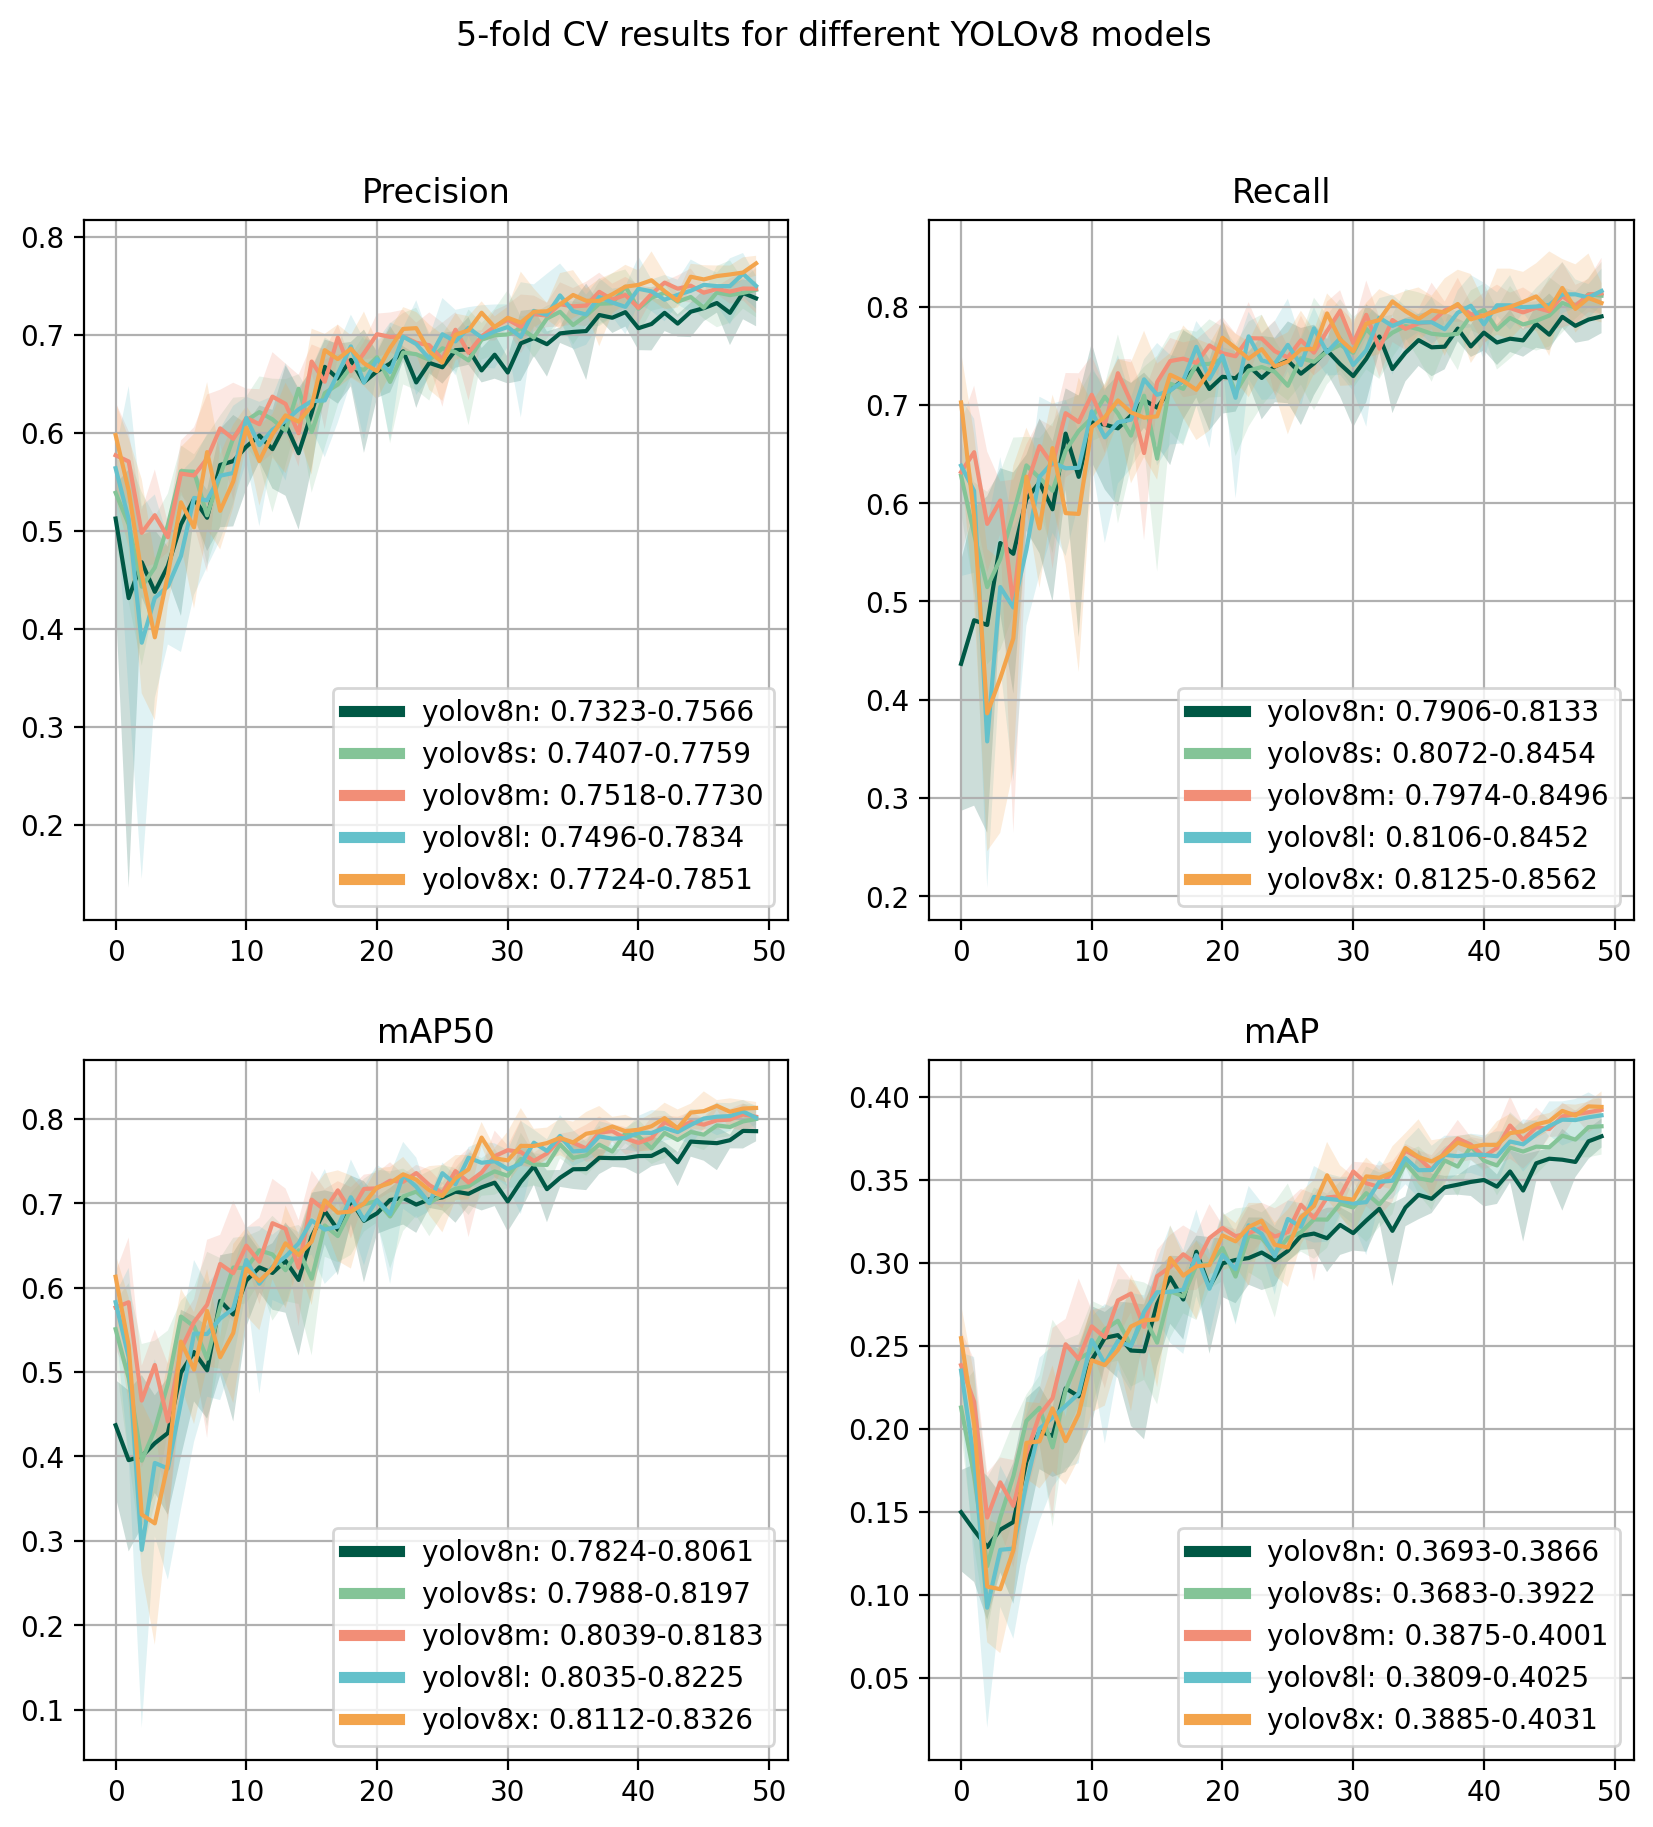

In [23]:
#| echo: False

fig, axs = plt.subplots(2,2, dpi=200, figsize=(10,10))

custom_lines = [Line2D([0], [0], color=syke5(0.), lw=4),
                Line2D([0], [0], color=syke5(.25), lw=4),
                Line2D([0], [0], color=syke5(.5), lw=4),
                Line2D([0], [0], color=syke5(.75), lw=4),
                Line2D([0], [0], color=syke5(1.), lw=4),]

pres = []
recs = []
mAP50s = []
mAPs = []

for i, m in enumerate(models):
    folds = os.listdir(model_path/m)
    pre = []
    rec = []
    mAP50 = []
    mAP = []
    for f in folds:
        if not os.path.exists(model_path/m/f/'results.csv'): continue
        res = pd.read_csv(model_path/m/f/'results.csv')
        res.rename(columns=lambda x: x.strip(), inplace=True)
        pre.append(res['metrics/precision(B)'])
        rec.append(res['metrics/recall(B)'])
        mAP50.append(res['metrics/mAP50(B)'])
        mAP.append(res['metrics/mAP50-95(B)'])
    axs[0,0].plot(np.array(pre).mean(axis=0), color=colors[i])
    axs[0,0].fill_between(range(0,50),
                          np.array(pre).min(axis=0),
                          np.array(pre).max(axis=0),
                          color=colors[i], alpha=0.2,
                          edgecolor='none')
    axs[0,1].plot(np.array(rec).mean(axis=0), color=colors[i])
    axs[0,1].fill_between(range(0,50),
                          np.array(rec).min(axis=0),
                          np.array(rec).max(axis=0),
                          color=colors[i], alpha=0.2,
                          edgecolor='none')
    axs[1,0].plot(np.array(mAP50).mean(axis=0), color=colors[i])
    axs[1,0].fill_between(range(0,50),
                          np.array(mAP50).min(axis=0),
                          np.array(mAP50).max(axis=0),
                          color=colors[i], alpha=0.2,
                          edgecolor='none')
    axs[1,1].plot(np.array(mAP).mean(axis=0), color=colors[i])
    axs[1,1].fill_between(range(0,50),
                          np.array(mAP).min(axis=0),
                          np.array(mAP).max(axis=0),
                          color=colors[i], alpha=0.2,
                          edgecolor='none')
    pres.append((np.array(pre).max(axis=1).min(), np.array(pre).max(axis=1).max()))
    recs.append((np.array(rec).max(axis=1).min(), np.array(rec).max(axis=1).max()))
    mAP50s.append((np.array(mAP50).max(axis=1).min(), np.array(mAP50).max(axis=1).max()))
    mAPs.append((np.array(mAP).max(axis=1).min(), np.array(mAP).max(axis=1).max()))
    
axs[0,0].set_title('Precision')
axs[0,1].set_title('Recall')
axs[1,0].set_title('mAP50')
axs[1,1].set_title('mAP')

axs[0,0].legend(custom_lines, [f'{m}: {pres[i][0]:.4f}-{pres[i][1]:.4f}' for i, m in enumerate(models)], loc=4)
axs[0,1].legend(custom_lines, [f'{m}: {recs[i][0]:.4f}-{recs[i][1]:.4f}' for i, m in enumerate(models)], loc=4)
axs[1,0].legend(custom_lines, [f'{m}: {mAP50s[i][0]:.4f}-{mAP50s[i][1]:.4f}' for i, m in enumerate(models)], loc=4)
axs[1,1].legend(custom_lines, [f'{m}: {mAPs[i][0]:.4f}-{mAPs[i][1]:.4f}' for i, m in enumerate(models)], loc=4)

for a in axs.flatten(): a.grid()

plt.suptitle('5-fold CV results for different YOLOv8 models')
    
plt.show()

Dark line is the average of the metric during the corresponding epoch, and shaded areas show the best and worst values.

# Test set results